# Central limit theorem

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF

## Building intuition

Let us consider experiment with flipping fair coin. Let probability of

In [2]:
number_of_experiments = 1000
number_of_throws_in_each_experiment = [5, 10, 20, 50, 100, 1000]

In [3]:
results = defaultdict(list)
for k in number_of_throws_in_each_experiment:
    for n in range(number_of_experiments):
        results[k].append(stats.bernoulli(p=.5).rvs(size=k).mean())

For each experiment we will define new random variable $$Z=\sqrt{n}\frac{\bar{X}-.5}{0.5}$$
Histograms for these variables are presented below

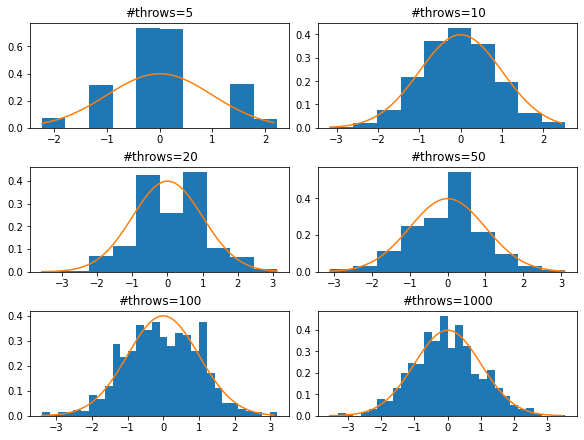

In [4]:
fig, ax = plt.subplots(3,2, figsize=(8,6), constrained_layout=True )
row=[0,0,1,1,2,2]
for i, (key, value) in enumerate(results.items()):
    x=np.array(value)
    y=(x-.5)*(np.sqrt(key))/(0.5)
    y_max, y_min = y.max(), y.min()
    z=np.arange(y_min, y_max, .1)
    ax[row[i], i%2].hist(y, density=True, bins = 10 if key<100 else 30)
    ax[row[i], i%2].plot(z, stats.norm.pdf(z))
    ax[row[i], i%2].set_title(f'#throws={key}')

Original random variable is discrete so holes in the histograms are cleary visible expecialy for small number of throws in experiment.
Let us also compare cumulative distribution for $\mathcal(N)(0,1)$ with empirical CDF for a random variable $Z$

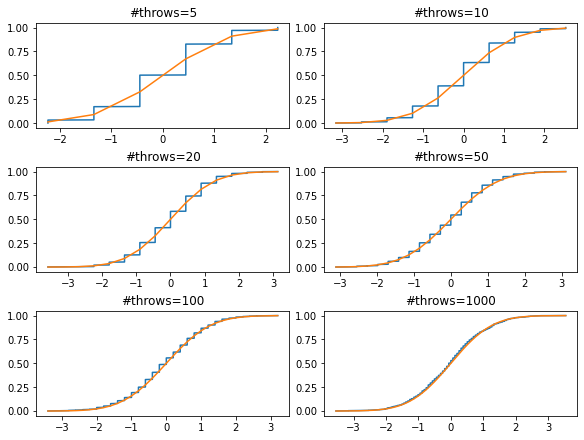

In [5]:
fig, ax = plt.subplots(3,2, figsize=(8,6), constrained_layout=True )
row=[0,0,1,1,2,2]
for i, (key, value) in enumerate(results.items()):
    x=np.array(value)
    y=(x-.5)*(np.sqrt(key))/(0.5)
    y_max, y_min = y.max(), y.min()
    z=np.arange(y_min, y_max, .1)
    ecdf = ECDF(y)    
    ax[row[i], i%2].plot(ecdf.x,ecdf.y)
    ax[row[i], i%2].plot(ecdf.x, stats.norm.cdf(ecdf.x))
    ax[row[i], i%2].set_title(f'#throws={key}')


We see that with increasing number of throws in the experiment we have better and better agreement of the distributions.

## Mathematical statment

Lets $n, i \in \mathbb{N}$ let $\{X_1^i, X_2^i, \ldots\, X_n^i\}$ be a collection of random samples of size $n$ from any distibution with finite mean $\mu$ and variance $\sigma^2$.
Classical CLT will state that

$$\lim_{n\rightarrow\infty}\frac{\frac{1}{n}\sum_{i=1}^{n}X_i-\mu}{\sigma/\sqrt{n}}\sim \mathcal{N}(0,1)$$

We will show this by numerical experiments.

### More distributions

In [6]:
list_of_distributions = [{'dist': stats.expon,'name': 'Exponential'}, 
                         {'dist': stats.beta(a=8,b=2), 'name': 'Beta(a=8,b=2)'}, 
                         {'dist': stats.gamma(a=4),'name': 'Gamma (a=1)'}, 
                         {'dist': stats.bernoulli(p=.3),'name':'Bernoulli (p=0.3)'},
                         {'dist': stats.binom(n=5,p=.3),'name':'Binomial (n=5, p=0.3)'},
                         {'dist': stats.poisson(mu=3),'name':'Poisson ($\mu=3$)'}
                        ]


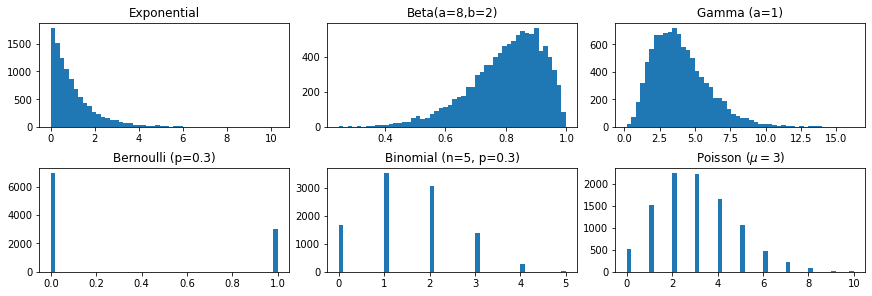

In [7]:
fig, ax = plt.subplots(2,3, figsize=(12,4), constrained_layout=True)
l=[0,0,0,1,1,1]
for i, dist in enumerate(list_of_distributions):
    ax[int(i>=3),i%3].hist(dist['dist'].rvs(size=10_000), bins=50)
    ax[int(i>=3),i%3].set_title(dist['name'])
plt.show()

In [8]:
number_of_experiments = 1000
number_of_throws_in_each_experiment = [5, 10, 15, 50]

In [9]:
results = defaultdict(lambda : defaultdict(list))
for dist in list_of_distributions:
    for k in number_of_throws_in_each_experiment:
        for n in range(number_of_experiments):
            results[dist['name']][k].append(dist['dist'].rvs(size=k).mean())

### Histograms

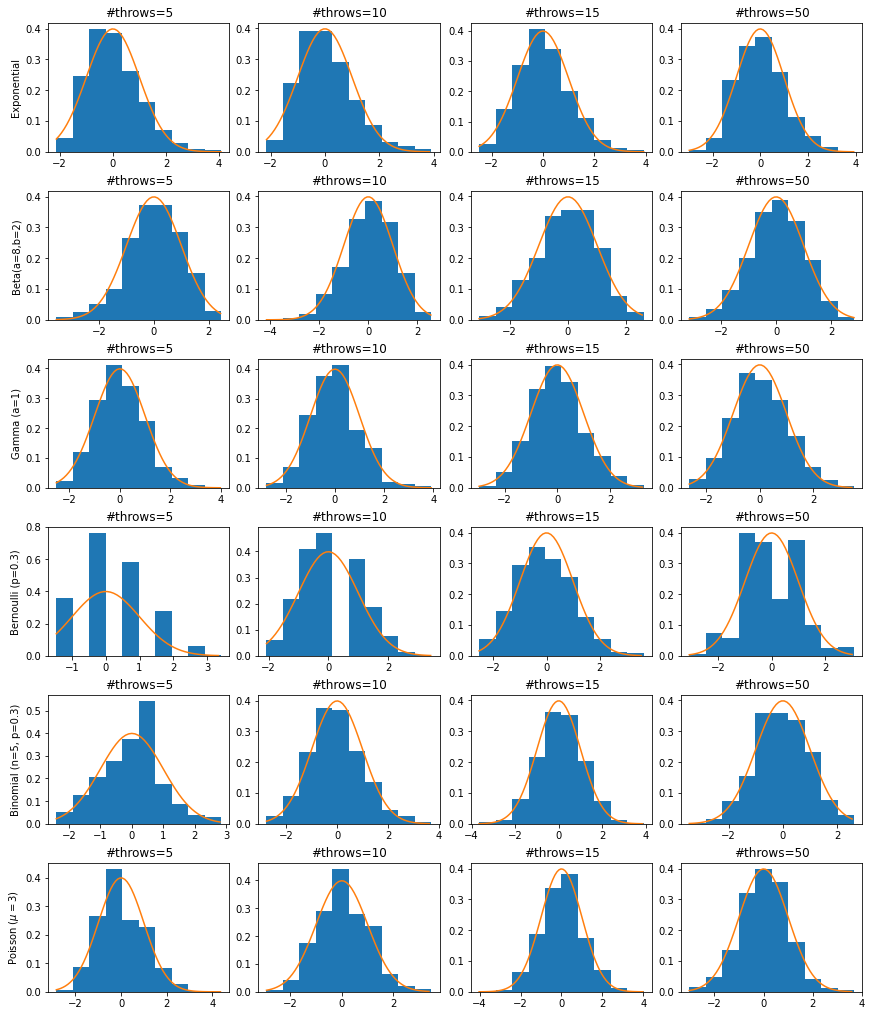

In [10]:
plot=1
fig = plt.figure( figsize=(12,14), constrained_layout=True )
for dist_name, dist_values in results.items():
    dist_ = [x['dist'] for x in list_of_distributions if dist_name==x['name']]
    var_mean = dist_[0].mean()
    var_std = dist_[0].std()
    for throws, values in dist_values.items():
        x=np.array(values)
        y=(x-var_mean)*np.sqrt(throws)/var_std
        y_max, y_min = y.max(), y.min()
        z=np.arange(y_min, y_max, .1)
        ax = fig.add_subplot(6,4,plot)
        ax.hist(y, density=True, bins = 10 if throws<100 else 30)
        if plot in [1,5,9,13,17,21]:
            ax.set_ylabel(dist_name)
        ax.plot(z, stats.norm.pdf(z))
        ax.set_title(f'#throws={throws}')
        plot+=1

    

### Normal CDF vs. ECDF

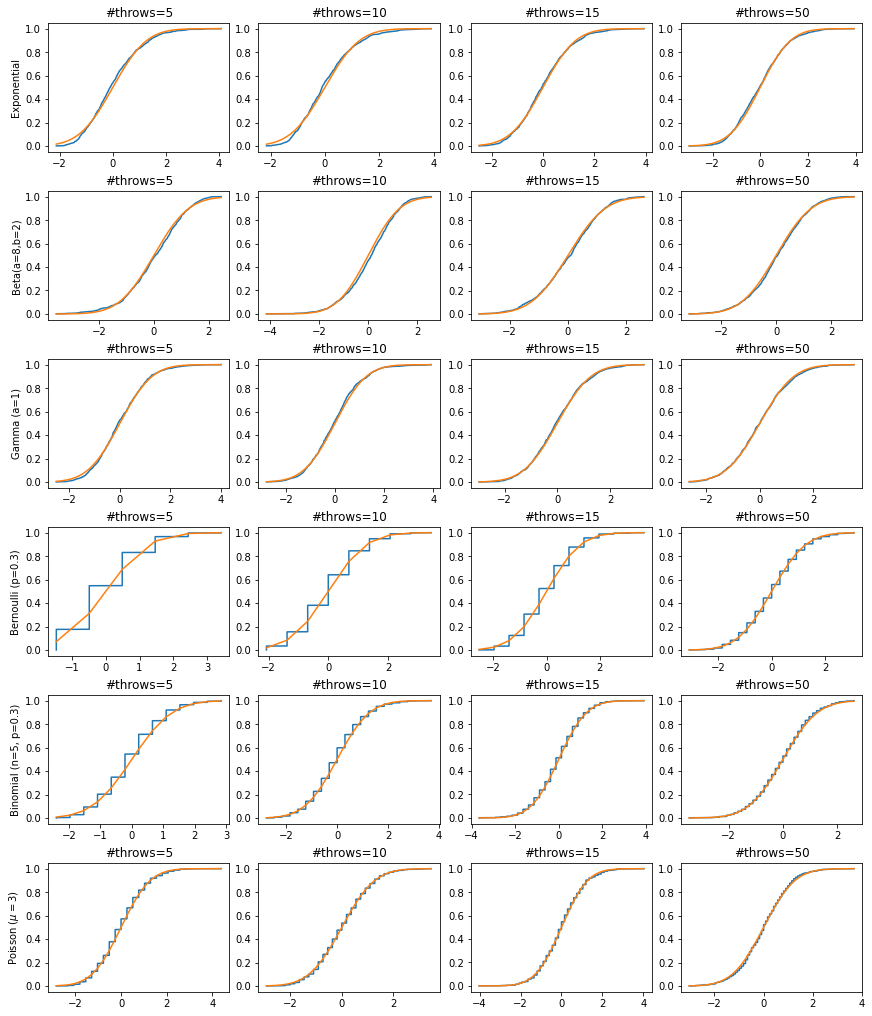

In [11]:
plot=1
fig = plt.figure( figsize=(12,14), constrained_layout=True )
for dist_name, dist_values in results.items():
    dist_ = [x['dist'] for x in list_of_distributions if dist_name==x['name']]
    var_mean = dist_[0].mean()
    var_std = dist_[0].std()
    for throws, values in dist_values.items():
        x=np.array(values)
        y=(x-var_mean)*np.sqrt(throws)/var_std
        y_max, y_min = y.max(), y.min()
        z=np.arange(y_min, y_max, .1)
        ecdf = ECDF(y)    
        ax = fig.add_subplot(6,4,plot)
        ax.plot(ecdf.x,ecdf.y)
        ax.plot(ecdf.x, stats.norm.cdf(ecdf.x))
        if plot in [1,5,9,13,17,21]:
            ax.set_ylabel(dist_name)
        ax.set_title(f'#throws={throws}')
        plot+=1